In [15]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# MPC import
from Deliverable_5_1.LinearMPC.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs



rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [17]:
Ts = 0.05
sim_time = 15; H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.0
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

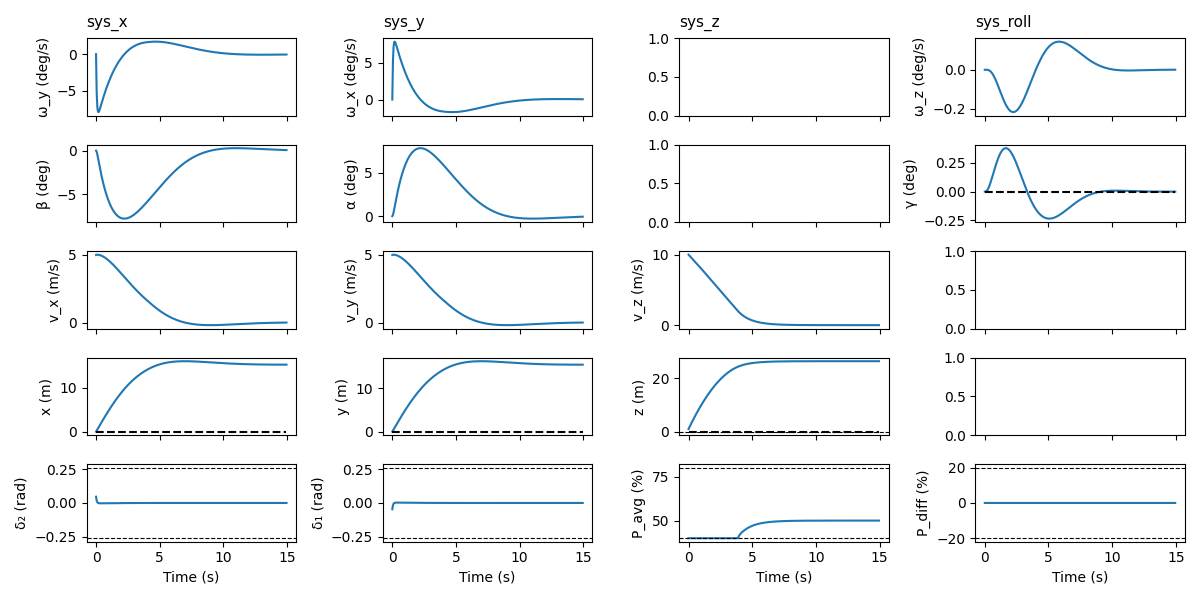

In [18]:
# Static visualization of states and inputs
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=x_target)

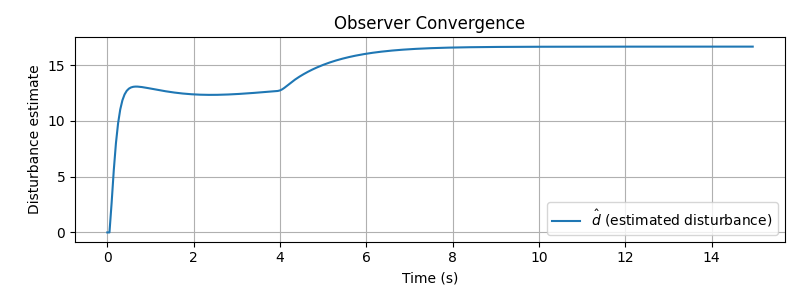

Final d_hat: 16.6665


In [19]:
# Check disturbance estimator convergence
import matplotlib.pyplot as plt

d_hat = np.array(mpc.mpc_z.d_hat_history)

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t_cl[:-1], d_hat, label=r'$\hat{d}$ (estimated disturbance)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Disturbance estimate')
ax.set_title('Observer Convergence')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

print(f"Final d_hat: {d_hat[-1]:.4f}")


Simulating Part 4 (no estimator)...
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05:

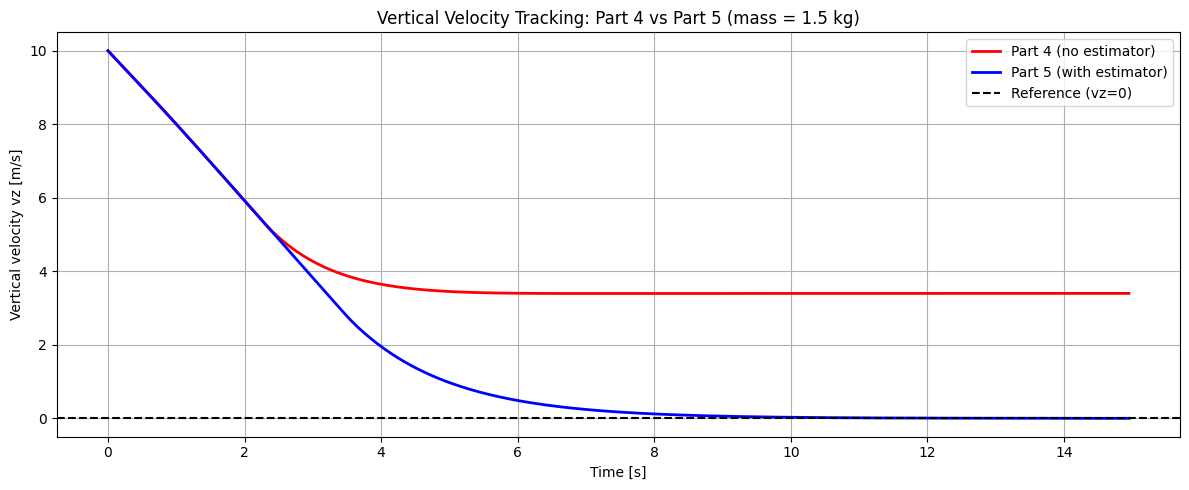

In [ ]:
# Add path for Deliverable_4_1 controller
import sys
import os
d41_path = os.path.join(os.path.dirname(os.getcwd()), 'Deliverable_4_1')
if d41_path not in sys.path:
    sys.path.append(d41_path)

# Import the controller from 4.1
from Deliverable_4_1.LinearMPC_4_1.MPCVelControl import MPCVelControl as MPCVelControl_4_1

# --- Simulation setup ---
Ts = 0.05
sim_time = 15.0
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

# --- Simulate Part 4 (no estimator) ---
print("Simulating Part 4 (no estimator)...")
rocket4 = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc4 = MPCVelControl_4_1().new_controller(rocket4, Ts, H)
rocket4.mass = 1.5
rocket4.fuel_rate = 0.0
t_cl_4, x_cl_4, u_cl_4, _, _, _, _ = rocket4.simulate_control(mpc4, sim_time, H, x0, x_target=x_target, method='nonlinear')
print("Simulation of Part 4 complete.")

# --- Simulate Part 5 (with estimator) ---
print("Simulating Part 5 (with estimator)...")
rocket5 = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc5 = MPCVelControl().new_controller(rocket5, Ts, H)
rocket5.mass = 1.5
rocket5.fuel_rate = 0.0
t_cl_5, x_cl_5, u_cl_5, _, _, _, _ = rocket5.simulate_control(mpc5, sim_time, H, x0, x_target=x_target, method='nonlinear')
print("Simulation of Part 5 complete.")

# --- Plotting ---
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

# 1. Vertical Velocity Tracking
ax.plot(t_cl_4[:-1], x_cl_4[8, :-1], 'r-', linewidth=2, label='Part 4 (no estimator)')
ax.plot(t_cl_5[:-1], x_cl_5[8, :-1], 'b-', linewidth=2, label='Part 5 (with estimator)')
ax.axhline(0, color='k', linestyle='--', label='Reference (vz=0)')
ax.set_title('Vertical Velocity Tracking: Part 4 vs Part 5 (mass = 1.5 kg)')
ax.set_ylabel('Vertical velocity vz [m/s]')
ax.set_xlabel('Time [s]')
ax.legend()
ax.grid(True)

plt.tight_layout()
fig.savefig('Figure 4_vertical_velocity.png')
plt.show()